<a href="https://colab.research.google.com/github/nupur1262/Brand-Logo/blob/master/MY_PROG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d nupurpahuja09/brand-logo

 97% 20.0M/20.5M [00:00<00:00, 90.8MB/s]
100% 20.5M/20.5M [00:00<00:00, 81.5MB/s]


In [ ]:
!unzip "*.zip"

Archive:  brand-logo.zip
  inflating: apple/00000000.jpg      
  inflating: apple/00000001.jpg      
  inflating: apple/00000002.jpg      
  inflating: apple/00000003.jpg      
  inflating: apple/00000004.jpg      
  inflating: apple/00000005.jpg      
  inflating: apple/00000006.jpg      
  inflating: apple/00000007.jpg      
  inflating: apple/00000008.jpg      
  inflating: apple/00000009.jpg      
  inflating: apple/00000010.jpg      
  inflating: apple/00000011.jpg      
  inflating: apple/00000012.jpg      
  inflating: apple/00000013.jpg      
  inflating: apple/00000014.jpg      
  inflating: apple/00000015.jpg      
  inflating: apple/00000016.jpg      
  inflating: apple/00000017.jpg      
  inflating: apple/00000018.jpg      
  inflating: apple/00000019.jpg      
  inflating: apple/00000020.jpg      
  inflating: apple/00000021.jpg      
  inflating: apple/00000022.jpg      
  inflating: apple/00000023.jpg      
  inflating: apple/00000024.jpg      
  inflating: apple/000000

In [54]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
path=""
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, )
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [56]:
data.classes

['apple',
 'image_data',
 'jio',
 'lenovo',
 'mi',
 'micromax',
 'nokia',
 'oneplus_logo',
 'oppo',
 'samsung',
 'vivo']

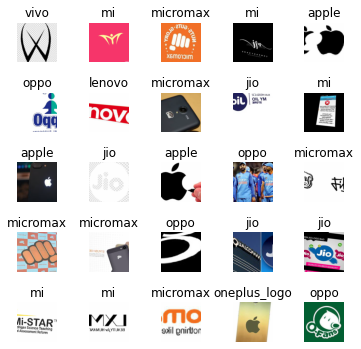

In [57]:
data.show_batch(rows=5, figsize=(5,5))

In [58]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.828867,2.403751,0.442413,21:07
1,2.168801,1.728450,0.555759,20:08
2,1.701580,1.557667,0.570384,20:10
3,1.393731,1.509746,0.583181,19:50


In [60]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [61]:
os.makedirs("/content/drive/My Drive/BRAND-LOGO/logo_recognition",exist_ok=True)

In [63]:
my_dir="/content/drive/My Drive/BRAND-LOGO/logo_recognition"

In [64]:
learn.save(my_dir+"/Stage-1")

In [65]:
learn.load("/content/drive/My Drive/BRAND-LOGO/logo_recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (2189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
oneplus_logo,oneplus_logo,oneplus_logo,oneplus_logo,oneplus_logo
Path: .;

Valid: LabelList (547 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lenovo,vivo,apple,micromax,oppo
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [66]:
learn.export(my_dir+"/export.pkl")